In [2]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


# Путь к директории с изображениями
data_dir = './flowers'

# Размерность, к которой будут приведены все изображения
target_size = (150, 150)
# Список классов (папок)
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
num_classes = len(classes)

# Инициализация списка для данных и меток
data = []
labels = []



# Преобразуем изображения
for label, class_name in enumerate(classes):
    class_dir = os.path.join(data_dir, class_name)
    
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        
        # Открываем изображение
        img = Image.open(img_path)
        
        # Преобразуем изображение к нужному размеру
        img_resized = img.resize(target_size)
        
        # Преобразуем изображение в массив
        img_array = np.array(img_resized)
        
        # Добавляем изображение и метку в список
        if img_array.shape == (target_size[0], target_size[1], 3):  # Убедимся, что изображение RGB
            data.append(img_array)
            labels.append(label)

# Преобразуем данные в numpy массивы
data = np.array(data)
labels = np.array(labels)

# Нормализация данных
data = data / 255.0

# Разделение на обучающую и валидационную выборки (например, 80% - 20%)
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, stratify=labels)

# Преобразование меток в one-hot кодировку
y_train = to_categorical(y_train, num_classes=len(classes))
y_val = to_categorical(y_val, num_classes=len(classes))

# Пример того, как данные выглядят после преобразования
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер валидационной выборки: {X_val.shape}")
print(f"Пример меток: {y_train[0]}")


Размер обучающей выборки: (3453, 150, 150, 3)
Размер валидационной выборки: (864, 150, 150, 3)
Пример меток: [0. 0. 0. 0. 1.]


Epoch 1/40
216/216 [==============================] - 3s 12ms/step - loss: 1.2962 - accuracy: 0.4295 - val_loss: 1.1193 - val_accuracy: 0.5567
Epoch 2/40
216/216 [==============================] - 2s 11ms/step - loss: 1.0275 - accuracy: 0.5888 - val_loss: 0.9336 - val_accuracy: 0.6285
Epoch 3/40
216/216 [==============================] - 2s 11ms/step - loss: 0.8921 - accuracy: 0.6467 - val_loss: 1.0188 - val_accuracy: 0.5995
Epoch 4/40
216/216 [==============================] - 2s 11ms/step - loss: 0.8145 - accuracy: 0.6913 - val_loss: 0.7904 - val_accuracy: 0.6921
Epoch 5/40
216/216 [==============================] - 2s 11ms/step - loss: 0.7183 - accuracy: 0.7301 - val_loss: 0.7752 - val_accuracy: 0.6887
Epoch 6/40
216/216 [==============================] - 2s 11ms/step - loss: 0.6289 - accuracy: 0.7544 - val_loss: 0.8082 - val_accuracy: 0.7106
Epoch 7/40
216/216 [==============================] - 2s 12ms/step - loss: 0.5273 - accuracy: 0.8103 - val_loss: 0.7984 - val_accuracy: 0.6887

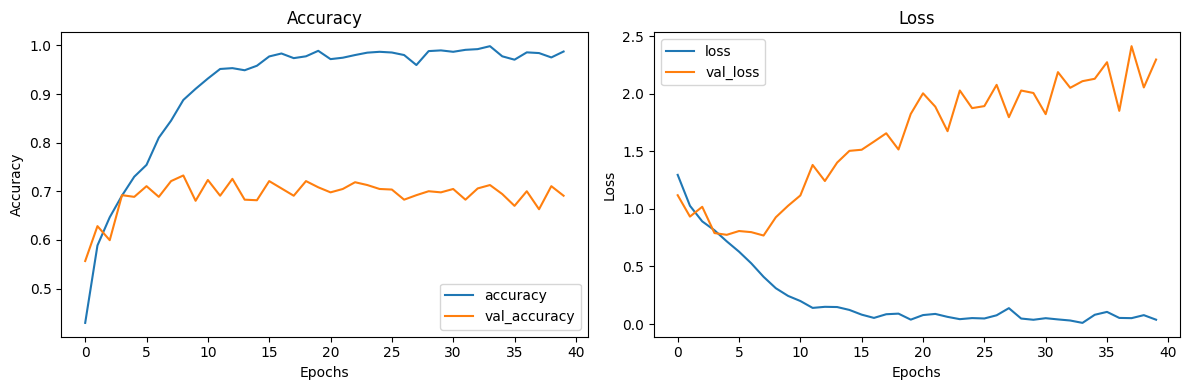

In [8]:


# Строим сверточную нейронную сеть
model = models.Sequential([
    # Сверточные слои и слои подвыборки
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(target_size[0], target_size[1], 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Выпрямление
    layers.Flatten(),
    
    # Полносвязные слои
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Дропаут для борьбы с переобучением
    layers.Dense(num_classes, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),  # Передаем валидационные данные для оценки на каждом шаге
    epochs=40,
    batch_size=16
)

model.save('model.h5')

# Построение графиков точности и ошибки
plt.figure(figsize=(12, 4))

# График точности
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# График ошибки потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
import os
import numpy as np
from joblib import load
from PIL import Image
from tensorflow.keras.models import load_model


# Загрузка модели
model = load_model('model.h5')

# Путь к основной папке с изображениями
root_dir = r'D:\Vyzovskoe3-4\7 сем\Анализ данных\лр4\flowers_test'

# Список классов
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

# Размер изображений для модели
target_size = (150, 150)

# Проход по каждой папке (классу)
for class_name in os.listdir(root_dir):
    class_dir = os.path.join(root_dir, class_name)

    # Проверяем, что это папка и имя соответствует классу
    if os.path.isdir(class_dir) and class_name in classes:
        print(f"\nChecking images in class folder: {class_name}")

        # Проход по всем изображениям внутри папки
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)

            try:
                # Проверка, что это файл изображения
                if img_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                    # Загрузка изображения
                    img = Image.open(img_path).convert('RGB')  # Преобразование в RGB
                    img = img.resize(target_size)  # Изменение размера

                    # Преобразование изображения в массив
                    img = np.array(img)
                    img = np.expand_dims(img, axis=0)  # Добавление batch dimension
                    img = img.astype(np.float32) / 255.0  # Нормализация

                    # Предсказание
                    y_pred = model.predict(img)
                    predicted_class_index = np.argmax(y_pred)  # Индекс предсказанного класса
                    predicted_class = classes[predicted_class_index]  # Название предсказанного класса

                    # Вывод результатов
                    print(f"Image: {img_name} | True Class: {class_name} | Predicted Class: {predicted_class}")
            except Exception as e:
                print(f"Error processing image {img_name}: {e}")



Checking images in class folder: daisy
1/1 [==============================] - 0s 56ms/step
Image: Снимок экрана 2024-12-18 014335.png | True Class: daisy | Predicted Class: daisy
1/1 [==============================] - 0s 15ms/step
Image: Снимок экрана 2024-12-18 014400.png | True Class: daisy | Predicted Class: daisy
1/1 [==============================] - 0s 15ms/step
Image: Снимок экрана 2024-12-18 014413.png | True Class: daisy | Predicted Class: daisy

Checking images in class folder: dandelion
1/1 [==============================] - 0s 15ms/step
Image: Снимок экрана 2024-12-18 014430.png | True Class: dandelion | Predicted Class: dandelion
1/1 [==============================] - 0s 15ms/step
Image: Снимок экрана 2024-12-18 014446.png | True Class: dandelion | Predicted Class: dandelion
1/1 [==============================] - 0s 15ms/step
Image: Снимок экрана 2024-12-18 014500.png | True Class: dandelion | Predicted Class: dandelion

Checking images in class folder: rose
1/1 [========

In [12]:
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import joblib

# Нормализация данных
scaler = MinMaxScaler()
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Преобразуем изображения в одномерный массив
X_train_scaled = scaler.fit_transform(X_train_flat)

# Настройка RBM
rbm = BernoulliRBM(n_components=256, learning_rate=0.1, n_iter=5, verbose=True)

# Обучение RBM
rbm.fit(X_train_scaled)
joblib.dump(rbm, 'BernoulliRBM')



[BernoulliRBM] Iteration 1, pseudo-likelihood = -41241.25, time = 107.11s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -41300.61, time = 109.03s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -40880.56, time = 108.92s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -41533.43, time = 109.27s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -41123.98, time = 109.22s


['BernoulliRBM']

In [22]:

rbm = joblib.load('BernoulliRBM')


# Получение весов из RBM
rbm_weights = rbm.components_
rbm_bias_hidden = rbm.intercept_hidden_
rbm_bias_visible = rbm.intercept_visible_

# Инициализация полносвязной нейронной сети с весами RBM
fc_model = models.Sequential([
    layers.Flatten(input_shape=(target_size[0], target_size[1], 3)),
    layers.Dense(256, activation='relu', kernel_initializer=tf.keras.initializers.Constant(rbm_weights.T), bias_initializer=tf.keras.initializers.Constant(rbm_bias_hidden)),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Компиляция модели
fc_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Дообучение модели
fc_history = fc_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=16
)

fc_model.save('fc_model_rbm.h5')


Epoch 1/100
216/216 [==============================] - 3s 11ms/step - loss: 35.3544 - accuracy: 0.2381 - val_loss: 5.5444 - val_accuracy: 0.2743
Epoch 2/100
216/216 [==============================] - 1s 7ms/step - loss: 7.7292 - accuracy: 0.2453 - val_loss: 5.5016 - val_accuracy: 0.2558
Epoch 3/100
216/216 [==============================] - 1s 7ms/step - loss: 5.0717 - accuracy: 0.2418 - val_loss: 2.7642 - val_accuracy: 0.2407
Epoch 4/100
216/216 [==============================] - 1s 7ms/step - loss: 3.3361 - accuracy: 0.2363 - val_loss: 2.6232 - val_accuracy: 0.2454
Epoch 5/100
216/216 [==============================] - 1s 7ms/step - loss: 3.0572 - accuracy: 0.2259 - val_loss: 2.1182 - val_accuracy: 0.2407
Epoch 6/100
216/216 [==============================] - 1s 7ms/step - loss: 2.2298 - accuracy: 0.2375 - val_loss: 2.0939 - val_accuracy: 0.2373
Epoch 7/100
216/216 [==============================] - 1s 7ms/step - loss: 1.9100 - accuracy: 0.2459 - val_loss: 1.8100 - val_accuracy: 0.24

--FC with RBM

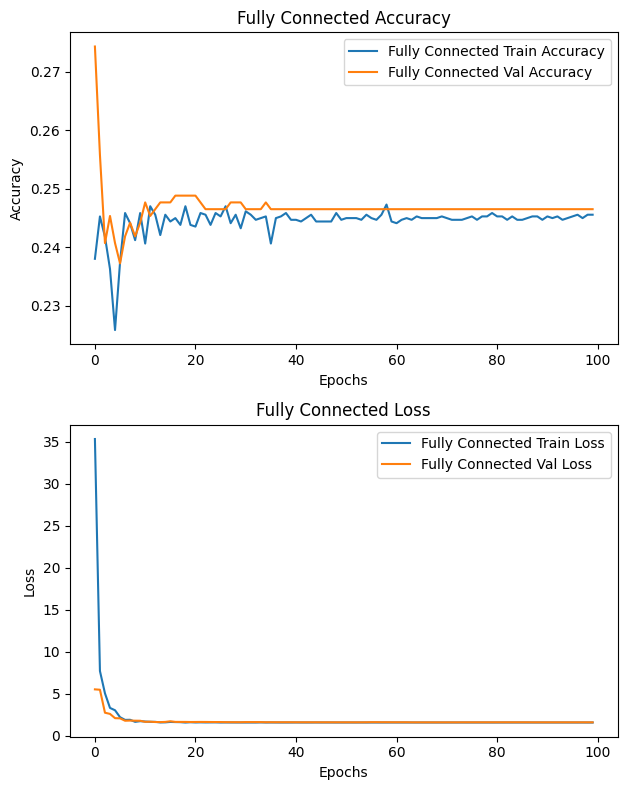

In [23]:
plt.figure(figsize=(12, 8))



plt.subplot(2, 2, 2)
plt.plot(fc_history.history['accuracy'], label='Fully Connected Train Accuracy')
plt.plot(fc_history.history['val_accuracy'], label='Fully Connected Val Accuracy')
plt.title('Fully Connected Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(fc_history.history['loss'], label='Fully Connected Train Loss')
plt.plot(fc_history.history['val_loss'], label='Fully Connected Val Loss')
plt.title('Fully Connected Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

-- FC without RBM


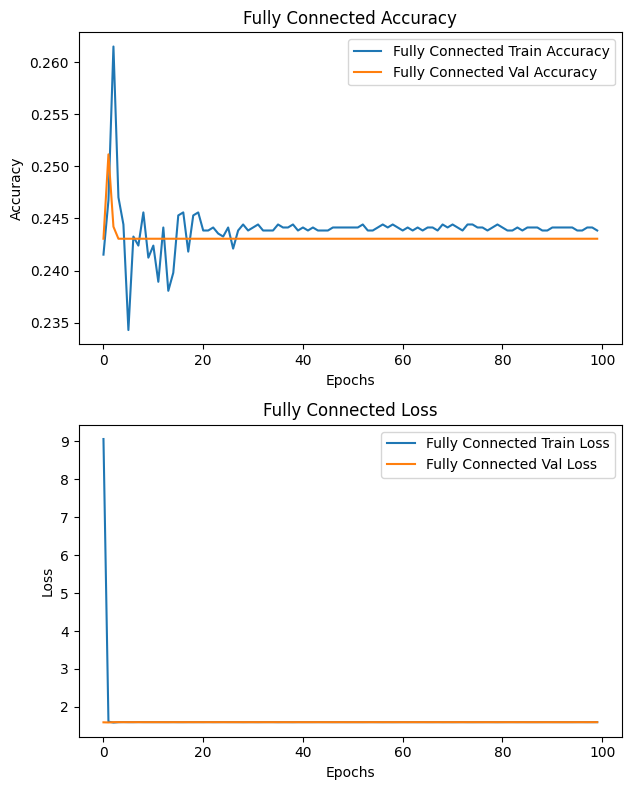

In [10]:

plt.figure(figsize=(12, 8))



plt.subplot(2, 2, 2)
plt.plot(fc_history.history['accuracy'], label='Fully Connected Train Accuracy')
plt.plot(fc_history.history['val_accuracy'], label='Fully Connected Val Accuracy')
plt.title('Fully Connected Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(fc_history.history['loss'], label='Fully Connected Train Loss')
plt.plot(fc_history.history['val_loss'], label='Fully Connected Val Loss')
plt.title('Fully Connected Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
